<a href="https://colab.research.google.com/github/anguswilliams93/GoogleColab/blob/main/Time_Series_Forecasting_(ARIMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series Forecasting With ARIMA Model in Python for Transaction Prediction

Time Series forecasting is one of the most in-demand techniques of data science, be it in stock trading, predicting business sales or weather forecasting.

The following Time Series Forecasting is to predict the amount of Transactions of a client.

First we need to import the data.

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
worksheet = gc.open('data_transactions').sheet1
rows = worksheet.get_all_values()

Now we need to clean the data.

In [52]:
import pandas as pd
import numpy as np
df = pd.DataFrame.from_records(rows, 
                                columns=['BatchCount', 'Date', 'TranType', 'Action', 'TranCount'])

df = df.astype({'BatchCount': int, 'TranType': str, 'Date': np.datetime64, 'Action': str, 'TranCount': int  })

df = df[['Date', 'TranCount']]

df_final = df.groupby('Date').sum()

df_final

,TranCount
Date,
2020-01-01,901
2020-01-02,4
2020-01-03,43126
2020-01-06,38806
2020-01-07,30524
...,...
2022-06-06,169937
2022-06-07,44309
2022-06-08,49912


Next step is to plot the data, to see if its stationary or not. To see the values in our case (transactions) are less or more associated with time. 


1. Constant Mean
2. Constant Variance(There can be variations, but the variations shouldn’t be irregular)
3. No seasonality(No repeating patterns in the data set)

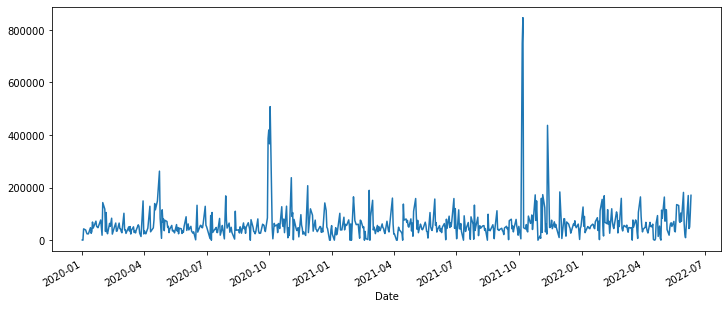

In [53]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_final['TranCount'].plot(figsize=(12,5))

To check to see if the data is statistically stationary, we run a adfuller test. If the p-value < 0.05 then the data is stationary, otherwise it isn't. As you can see below, it is less then 0.05, therefore we can confirm its stationary.

In [54]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


ad_test(df_final['TranCount'])

1. ADF :  -17.074160514200795
2. P-Value :  7.787833185945982e-30
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 608
5. Critical Values :
	 1% :  -3.4411511898545206
	 5% :  -2.866305414688104
	 10% :  -2.569307861950312


We simple supply our data to the auto_arima function. The function basically uses something called as the AIC score to judge how good a particular order model is. It simply tries to minimize the AIC score, and here’s how the output looks like:

We now have to split the data set into a training and testing section. We do this because we first train the model on the data and keep the testing section hidden from the model. Once model is ready, we ask it to make predictions on the test data and see how well it performs.

In [59]:
from pmdarima.model_selection import train_test_split
from pmdarima import auto_arima

y = df_final['TranCount']

train, test = train_test_split(y, train_size=300)

# Fit your model
model = auto_arima(train, seasonal=False)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

In [60]:
from dateutil import parser

date1 = parser.parse('2022-06-20')
date2 = parser.parse('2022-07-21')

diff = date2 - date1


model.predict(diff.days).sum()  # Sum the transactions in 15 days ... 

1590872.0622155326